# Probability Theory

### Random Variable (확률변수)
- A variable that can take on different values ramdomly.
- $x_1$, $x_2$ $\cdot \cdot$ are possible values the variable x could be.
- A probability distribution specifies how likely each value is to occur.

### Probability Mass Functions (확률질량함수)
- Probability distributions for discrete random variables are referred to as Probability Mass Functions (PMF).
- 이산 확률 변수에서 특정 값에 대한 확률을 나타내는 함수이다. 이 함수는 연속 확률 변수에서의 확률 밀도 함수와 대응된다.
- PMF 의 3 가지 기준  
    - The domain P must be the set of all possible states of x.  
    - $0 \leq P(x) \leq 1 \text{  }$  (모든 possible states 의 발생 확률)
    - $\sum_{x \in X} P(x) = 1$
    
### 확률의 종류
1. Joint Probability Distribution (결합확률분포)
    - A probability mass function that acts on multiple variables.
    - $P(x = x, y = y)$ denotes the probability that x = x and y = y simultaneously. 
2. Uniform Distribution (균등분포)
    - Each state of distribution is equally likely.
    - $P(x = x_i) = \frac{1}{k}$
    - $\sum_i P(x = x_i) = \sum_i \frac{1}{k_i} = \frac{k}{k} = 1$
    
### Probability Density Function (확률밀도함수)
- Probability distributions for continous variables are called Probability Density Functions (PDF) 
- To be a PDF, the function p must satisfy, 
    - The domain p must be the set of all possible states of x
    - $p(x) \geq 0$
    - $\int p(x)dx = 1$
    
### Marginal Probability (주변확률분포)
- The probability distribution over a subset of all the variables
#### With discrete random variables :
    - If we know P(x, y), we can find P(x) with the **sum rule**
    - $P(X = x) = \sum_y P(X = x, Y = y)$
#### With continuous random variables :
    - $p(x) = \int p(x,y)dy$
    
### Conditional Probability (조건부 확률분포)
- The probability of some event, given that some other event has happened.  
- $P(Y = y | X = x) = \displaystyle \frac{P(Y = y, X = x)}{P(X=x)}$  

### 결합확률(joint probability)은 사건  x 와  y 가 동시에 발생할 확률
- x 도 진실이고 y 도 진실이므로 두 사건 x, y 가 동시에 발생할 확률은 두 사건의 교집합을 계산하는 것과 같다.  
- 조건부 확률은 y 가 사실일 경우 x 의 확률을 계산하는 것이다.  
$P(x\cap y)$ 또는 P(x, y)

# Expectation, Variance, Covariance (기대값, 분산, 공분산)

#### 기댓값(expected value)은 통계에서는 평균과 같다고 생각하면 된다. 가능한 값마다 확률을 곱해서 모두 더한 것이다.   

#### 분산(variance, 변량)은 그 확률변수가 기댓값으로부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자이다
$$\operatorname {var}(X)=\operatorname {E}((X-\mu )^{2})$$
#### 표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.  
#### Covariance measures how much two variables are linearly related to each other.   
    만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승하는 경향의 상관관계에 있다면, 공분산의 값은 양수가 될 것이다. 반대로 2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값이 하강하는 경향을 보인다면 공분산의 값은 음수가 된다.
$${\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname 
{E} [X])(Y-\operatorname {E} [Y]){\big ]}}}$$

#### Covariance Matrix 
    열벡터값을 가지는 확률변수X 와 Y 가 각각 μ 와 ν라는 기댓값을 가질 때 공분산m×n 행렬은 아래와 같다.
$$\operatorname {Cov}(X,Y)=\operatorname {E}((X-\mu )(Y-\nu )^{\top })$$

    공분산을 정규화시키면 상관관계 행렬을 얻을 수 있다. 이로부터 Pearson Coefficient값을 얻을 수 있고 두개의 확률변수의 관계를 최적으로 설명가능한 선형함수를 표현가능하게 해준다.

<img src="PIC25D.gif" width="300">

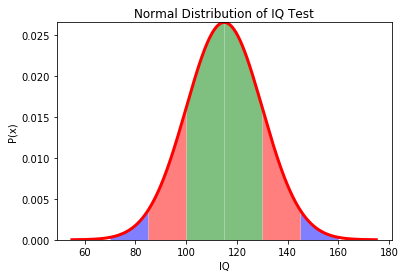

In [46]:
# Normal Distribution of IQ Test
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

mean = 115
std = 15
iq = norm(mean, std)

x = np.arange(mean - 4*std, mean + 4*std, 0.1)

plt.plot(x, iq.pdf(x), 'r', linewidth=3)

color = ['red', 'blue', 'green']

for i in range(3):
    low = mean + i * std
    high = mean + (i+1) * std
    px = x[np.logical_and(x >= low, x <= high)]
    plt.fill_between(
        px,
        iq.pdf(px),
        color=color[i-1],
        alpha=0.5,
        linewidth=0,
    )
    high = mean - i * std
    low = mean - (i+1) * std
    px = x[np.logical_and(x >= low, x <= high)]
    plt.fill_between(
        px,
        iq.pdf(px),
        color=color[i-1],
        alpha=0.5,
        linewidth=0,
    )
    
plt.margins(y=0)
plt.xlabel('IQ')
plt.ylabel('P(x)')
plt.title('Normal Distribution of IQ Test')
plt.show()

In [52]:
# Building a Covariance Matrix
a = np.array([1,2,3,4,5,6])
b = np.array([1,3,5,7,9,11])
c = np.array([10,20,30,40,50,60])
d = np.array([2,5,5,2,1,0])
e = np.array([4,5,6,7,8,9])

In [69]:
M = np.stack([a, b, c, d, e], axis=1)
M

array([[ 1,  1, 10,  2,  4],
       [ 2,  3, 20,  5,  5],
       [ 3,  5, 30,  5,  6],
       [ 4,  7, 40,  2,  7],
       [ 5,  9, 50,  1,  8],
       [ 6, 11, 60,  0,  9]])

In [87]:
np.cov(M)

array([[ 14.3 ,  27.25,  41.4 ,  56.75,  71.3 ,  85.85],
       [ 27.25,  54.5 ,  83.25, 113.5 , 142.75, 172.  ],
       [ 41.4 ,  83.25, 128.7 , 177.75, 224.4 , 271.05],
       [ 56.75, 113.5 , 177.75, 249.5 , 316.25, 383.  ],
       [ 71.3 , 142.75, 224.4 , 316.25, 401.3 , 486.35],
       [ 85.85, 172.  , 271.05, 383.  , 486.35, 589.7 ]])